In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv('Downloads/clustering/clustering_mall_dataset/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [46]:
X = df.iloc[:, [3, 4]].values


Elbow method

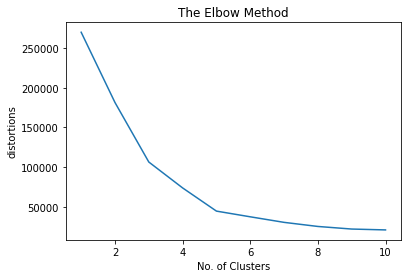

In [10]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 11), distortions)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('distortions')
plt.show()

Applying K_MEANS


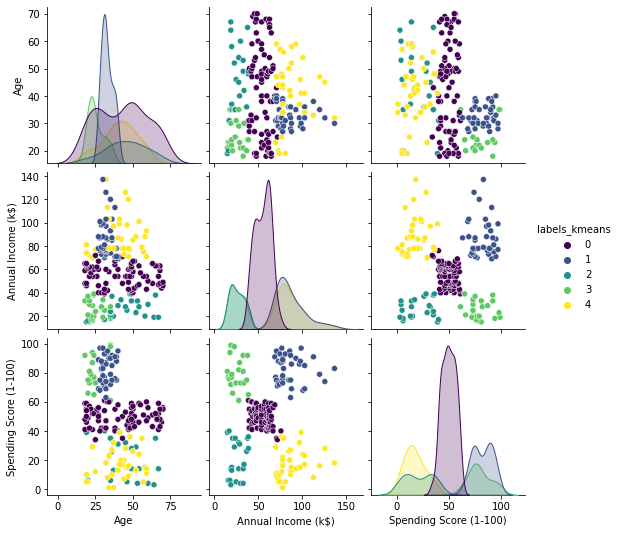

In [21]:
km = KMeans(n_clusters=5)
df["labels_kmeans"] = km.fit_predict(X)
sns.pairplot(df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue = "labels_kmeans", palette="viridis");

In [88]:
df.loc[(df['labels_kmeans'] == 0), 'labels_kmeans'] = 'Low income low spenders'
df.loc[(df['labels_kmeans'] == 1), 'labels_kmeans'] = 'High income low spenders'
df.loc[(df['labels_kmeans'] == 2), 'labels_kmeans'] = 'Medium income medium spenders'
df.loc[(df['labels_kmeans'] == 3), 'labels_kmeans'] = 'Low income high spenders'
df.loc[(df['labels_kmeans'] == 4), 'labels_kmeans'] = 'High income high spenders'
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),labels_kmeans,kmeans_predicted,klabels_kmeans
0,1,Male,19,15,39,Medium income medium spenders,3,NaN
1,2,Male,21,15,81,Low income high spenders,4,NaN
2,3,Female,20,16,6,Medium income medium spenders,3,NaN
3,4,Female,23,16,77,Low income high spenders,4,NaN
4,5,Female,31,17,40,Medium income medium spenders,3,NaN
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,High income low spenders,1,NaN
196,197,Female,45,126,28,High income high spenders,2,High income high spenders
197,198,Male,32,126,74,High income low spenders,1,NaN
198,199,Male,32,137,18,High income high spenders,2,High income high spenders


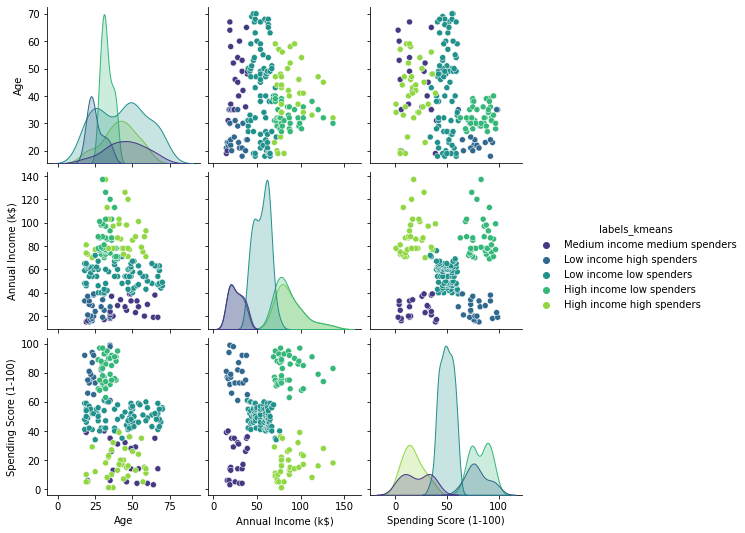

In [26]:
sns.pairplot(df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue = "labels_kmeans", palette="viridis");

Applying linear regression on 'medium income medium spenders'

In [139]:
X = df.loc[df['labels_kmeans'] == 'Medium income medium spenders'].drop(
    ['labels_kmeans','Spending Score (1-100)','klabels_kmeans','kmeans_predicted', 'Gender', 'CustomerID'],axis=1).values

In [137]:
y = df.loc[df['labels_kmeans'] == 'Medium income medium spenders'].drop(
    ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'labels_kmeans','klabels_kmeans','kmeans_predicted'],axis=1).values

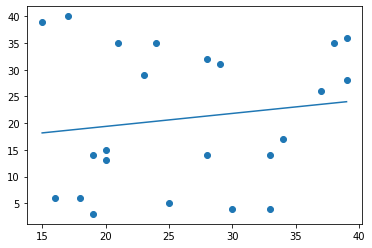

In [138]:
lr = LinearRegression()
lr.fit(X,y)
predict = lr.predict(X)
plt.scatter(X,y,)
plt.plot(X,lr.predict(X))
plt.show()


In [158]:
print('Intercept',lr.intercept_)
print('Coefficient',lr.coef_)

Intercept [60.31995782]
Coefficient [[-0.19533748]]


train and test

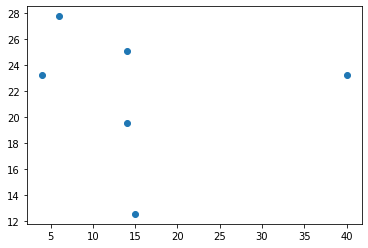

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = LinearRegression()
lr.fit(X_train,y_train)
predict = lr.predict(X_test)
plt.scatter(y_test,predict);

In [141]:
#Evaluation
print("MSE: " + str(metrics.mean_squared_error(y_test,predict)))
print("RMSE: " + str(np.sqrt(metrics.mean_squared_error(y_test,predict))))

MSE: 214.16956687869492
RMSE: 14.63453336730266


Applying Linear regression on low income low spenders

In [160]:
X = df.loc[df['labels_kmeans'] == 'Low income low spenders'].drop(
    ['labels_kmeans','Spending Score (1-100)','klabels_kmeans','kmeans_predicted', 'Gender', 'CustomerID'],axis=1).values

In [155]:
y = df.loc[df['labels_kmeans'] == 'Low income low spenders'].drop(
    ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'labels_kmeans','klabels_kmeans','kmeans_predicted'],axis=1).values

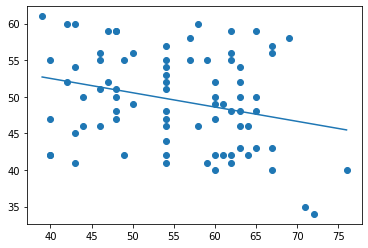

In [156]:
lr = LinearRegression()
lr.fit(X,y)
predict = lr.predict(X)
plt.scatter(X,y,)
plt.plot(X,lr.predict(X))
plt.show()


In [159]:
print('Intercept',lr.intercept_)
print('Coefficient',lr.coef_)

Intercept [60.31995782]
Coefficient [[-0.19533748]]


train and test

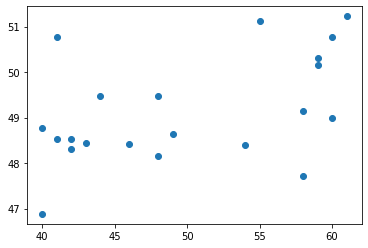

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = LinearRegression()
lr.fit(X_train,y_train)
predict = lr.predict(X_test)
plt.scatter(y_test,predict);

In [163]:
#Evaluation
print("MSE: " + str(metrics.mean_squared_error(y_test,predict)))
print("RMSE: " + str(np.sqrt(metrics.mean_squared_error(y_test,predict))))

MSE: 52.97382004575832
RMSE: 7.278311620544859


Applying linear regression on high income low spenders

In [168]:
X = df.loc[df['labels_kmeans'] == 'High income low spenders'].drop(
    ['labels_kmeans','Spending Score (1-100)','klabels_kmeans','kmeans_predicted', 'Gender', 'CustomerID'],axis=1).values

In [166]:
y = df.loc[df['labels_kmeans'] == 'High income low spenders'].drop(
    ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'labels_kmeans','klabels_kmeans','kmeans_predicted'],axis=1).values

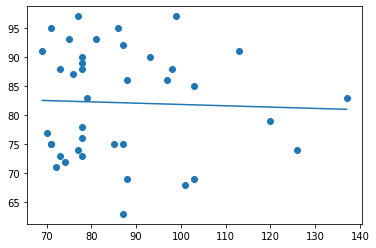

In [167]:
lr = LinearRegression()
lr.fit(X,y)
predict = lr.predict(X)
plt.scatter(X,y,)
plt.plot(X,lr.predict(X))
plt.show()


train and test

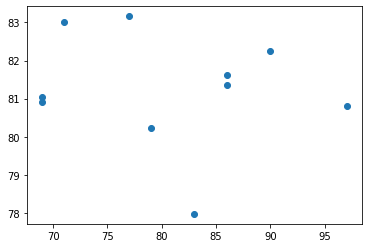

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = LinearRegression()
lr.fit(X_train,y_train)
predict = lr.predict(X_test)
plt.scatter(y_test,predict);

In [170]:
#Evaluation
print("MSE: " + str(metrics.mean_squared_error(y_test,predict)))
print("RMSE: " + str(np.sqrt(metrics.mean_squared_error(y_test,predict))))

MSE: 85.86645321751043
RMSE: 9.266415338064144


Appliying linear regression on low income high spenders

In [178]:
X = df.loc[df['labels_kmeans'] == 'Low income high spenders'].drop(
    ['labels_kmeans','Spending Score (1-100)','klabels_kmeans','kmeans_predicted', 'Gender', 'CustomerID'],axis=1).values

In [176]:
y = df.loc[df['labels_kmeans'] == 'Low income high spenders'].drop(
    ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'labels_kmeans','klabels_kmeans','kmeans_predicted'],axis=1).values

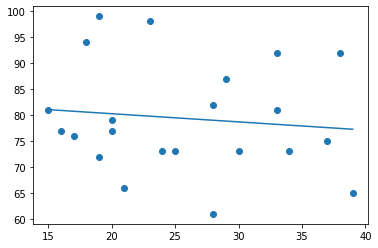

In [177]:
lr = LinearRegression()
lr.fit(X,y)
predict = lr.predict(X)
plt.scatter(X,y,)
plt.plot(X,lr.predict(X))
plt.show()


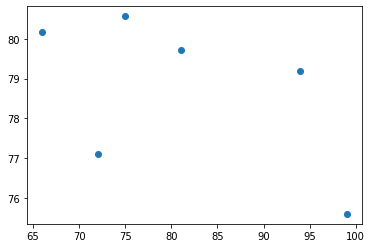

In [179]:
#train and test
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = LinearRegression()
lr.fit(X_train,y_train)
predict = lr.predict(X_test)
plt.scatter(y_test,predict);

In [180]:
#Evaluation
print("MSE: " + str(metrics.mean_squared_error(y_test,predict)))
print("RMSE: " + str(np.sqrt(metrics.mean_squared_error(y_test,predict))))

MSE: 171.13204940247462
RMSE: 13.081744891354312


Applying linear regression on high income high spenders

In [185]:
X = df.loc[df['labels_kmeans'] == 'High income high spenders'].drop(
    ['labels_kmeans','Spending Score (1-100)','klabels_kmeans','kmeans_predicted', 'Gender', 'CustomerID'],axis=1).values

In [183]:
y = df.loc[df['labels_kmeans'] == 'High income high spenders'].drop(
    ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'labels_kmeans','klabels_kmeans','kmeans_predicted'],axis=1).values

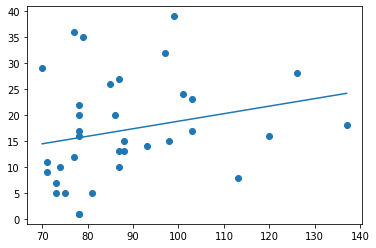

In [184]:
lr = LinearRegression()
lr.fit(X,y)
predict = lr.predict(X)
plt.scatter(X,y,)
plt.plot(X,lr.predict(X))
plt.show()


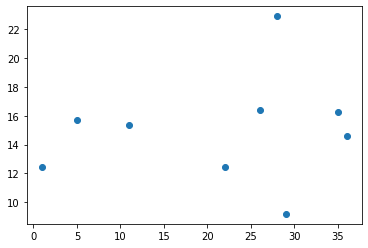

In [186]:
#train and test
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = LinearRegression()
lr.fit(X_train,y_train)
predict = lr.predict(X_test)
plt.scatter(y_test,predict);

In [187]:
#Evaluation
print("MSE: " + str(metrics.mean_squared_error(y_test,predict)))
print("RMSE: " + str(np.sqrt(metrics.mean_squared_error(y_test,predict))))

MSE: 186.2493697595648
RMSE: 13.647320973713661
